In [55]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Load the dataset
df = pd.read_csv("T-20 World cup 2022.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())

   comment_id  match_id match_name home_team away_team current_innings  \
0         130   1298179  ENG v PAK       PAK       ENG             PAK   
1         120   1298179  ENG v PAK       PAK       ENG             PAK   
2         110   1298179  ENG v PAK       PAK       ENG             PAK   
3         140   1298179  ENG v PAK       PAK       ENG             PAK   
4         150   1298179  ENG v PAK       PAK       ENG             PAK   

   innings_id  over  ball  runs  ... wicket_id  wkt_batsman_name  \
0           1     1     1     0  ...       NaN               NaN   
1           1     1     1     1  ...       NaN               NaN   
2           1     1     1     1  ...       NaN               NaN   
3           1     1     2     2  ...       NaN               NaN   
4           1     1     3     0  ...       NaN               NaN   

   wkt_bowler_name  wkt_batsman_runs  wkt_batsman_balls wkt_text  \
0              NaN               NaN                NaN      NaN   
1         

In [57]:
df

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,218020,1298135,NAM v SL,NAM,SL,SL,2,19,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"slower ball on a length, waits for this and op...",NaN,NaN
9810,218030,1298135,NAM v SL,NAM,SL,SL,2,19,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"another slower ball, keeps very low. Bounces t...",NaN,NaN
9811,218040,1298135,NAM v SL,NAM,SL,SL,2,19,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Almost cleans him up! Yorker finds it's way pa...,NaN,NaN
9812,218050,1298135,NAM v SL,NAM,SL,SL,2,19,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short ball, goes for the uppercut and misses",NaN,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

In [59]:
# Check for missing values
print(df.isnull().sum())

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_runs     9263
wkt_batsman_

# Data Cleaning

Missing values are handled differently for numerical and categorical columns:
- Numerical columns with missing values are filled with the mean of the respective column using fillna().
- Categorical columns with missing values are filled with the mode (most frequent value) using fillna().

In [60]:
# Data Cleaning
# Handling missing values

# For numerical columns
numerical_columns = ['bowler2_id', 'bowler2_overs', 'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts',
                     'wicket_id', 'wkt_batsman_runs', 'wkt_batsman_balls']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].mean())  # Fill missing numerical values with mean

# For categorical columns
categorical_columns = ['bowler2_name', 'wkt_batsman_name', 'wkt_bowler_name', 'wkt_text', 'text', 'preText', 'postText']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill missing categorical values with mode


# Drop columns with a high percentage of missing values
df.dropna(thresh=len(df) * 0.7, axis=1, inplace=True)  # Drop columns with more than 70% missing values


# Now the dataset should be cleaned and ready for further analysis
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

# Descriptive statistics 

In [61]:
df.describe()

,comment_id,match_id,innings_id,over,ball,runs,batsman1_id,batsman1_runs,batsman1_balls,bowler1_id,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls
count,9814.000000,9.814000e+03,9814.000000,9814.000000,9814.000000,9814.000000,9.814000e+03,9814.000000,9814.000000,9.814000e+03,...,9814.000000,9814.000000,9.814000e+03,9814.000000,9814.000000,9814.000000,9814.000000,9.814000e+03,9814.000000,9814.000000
mean,85399.661708,1.298157e+06,1.477787,10.082841,3.486856,1.202262,5.377303e+05,15.691971,13.249440,6.226676e+05,...,14.978296,12.738537,6.216881e+05,2.172265,0.031654,14.684755,0.641042,5.691470e+05,15.029038,13.800363
std,78951.670137,1.355630e+01,0.499532,5.623045,1.707484,1.476730,3.181419e+05,16.454378,11.471307,3.276842e+05,...,16.376065,11.596212,3.198555e+05,1.011267,0.177363,9.111999,0.810436,7.825672e+04,3.898429,2.771653
min,110.000000,1.298135e+06,1.000000,1.000000,1.000000,0.000000,5.334000e+03,0.000000,0.000000,8.917000e+03,...,0.000000,0.000000,8.917000e+03,0.100000,0.000000,0.000000,0.000000,5.334000e+03,0.000000,1.000000
25%,18030.000000,1.298145e+06,1.000000,5.000000,2.000000,0.000000,3.089670e+05,4.000000,4.000000,3.481090e+05,...,2.000000,4.000000,3.481090e+05,1.000000,0.000000,8.000000,0.000000,5.691470e+05,15.029038,13.800363
50%,29010.000000,1.298157e+06,1.000000,10.000000,3.000000,1.000000,4.465070e+05,10.000000,10.000000,5.420230e+05,...,9.000000,9.000000,5.538210e+05,2.000000,0.000000,14.000000,0.000000,5.691470e+05,15.029038,13.800363
75%,118040.000000,1.298169e+06,2.000000,15.000000,5.000000,1.000000,7.843670e+05,23.000000,19.000000,9.229430e+05,...,23.000000,19.000000,9.067830e+05,3.000000,0.000000,20.000000,1.000000,5.691470e+05,15.029038,13.800363
max,219090.000000,1.298179e+06,2.000000,20.000000,6.000000,7.000000,1.278252e+06,109.000000,63.000000,1.278252e+06,...,107.000000,63.000000,1.278252e+06,4.000000,2.000000,59.000000,4.000000,1.278252e+06,109.000000,60.000000


# Data Exploration

In [62]:
# Data Analysis
# Analyze team-wise performance metrics
team_performance = df.groupby(['home_team', 'away_team']).agg({'runs': 'sum', 'bowler1_wkts': 'sum'})
print("\nTeam-wise performance metrics:")
print(team_performance)



Team-wise performance metrics:
                     runs  bowler1_wkts
home_team away_team                    
AFG       ENG         225           127
          SL          291            99
AUS       AFG         332           131
          IRE         298           170
BAN       NED         277           164
          PAK         255            85
          ZIM         297           139
ENG       NZ          337            93
INDIA     BAN         329           121
          ENG         338            51
          NED         302           123
          SA          270           177
          ZIM         295           125
IRE       ENG         262           121
          SL          261            86
NAM       NED         243           106
          SL          271           201
NED       PAK         186           107
          SA          299            85
NZ        AUS         311           111
          IRE         331           126
          PAK         305            45
        

From the team-wise performance metrics:

- **Runs Scored:** Teams like Scotland (SCOT), Australia (AUS), and India (INDIA) have managed to score high totals, indicating strong batting performances in their matches.
- **Wickets Taken:** Zimbabwe (ZIM), South Africa (SA), and Ireland (IRE) appear to have performed well in terms of taking wickets, suggesting effective bowling strategies.
- **Variability:** There is significant variability in performance across different teams and matches. For example, some teams show consistency in both batting and bowling performance (e.g., Australia), while others exhibit disparities (e.g., Pakistan).
- **Match-ups:** Certain match-ups seem to result in higher or lower runs scored and wickets taken. For instance, matches involving teams like Zimbabwe and Ireland show higher wicket-taking activity, indicating potentially competitive encounters.
- **Impact of Home Advantage:** Home teams might have an advantage, as seen in the performance of teams like England (ENG) and India (INDIA) when playing at home.
- **Potential Strategies:** Teams with weaker bowling performances may need to focus on improving their bowling strategies to enhance their overall performance, while teams struggling with batting might need to work on their batting line-up and strategies.


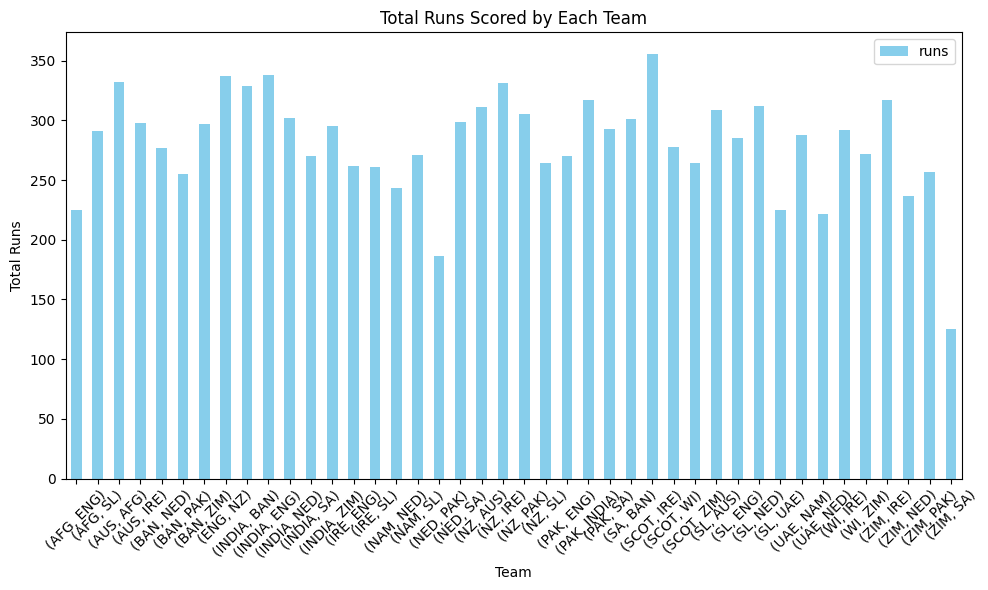

In [63]:
# Visualization
# Plot total runs scored by each team
team_performance.plot(kind='bar', y='runs', figsize=(10, 6), color='skyblue')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

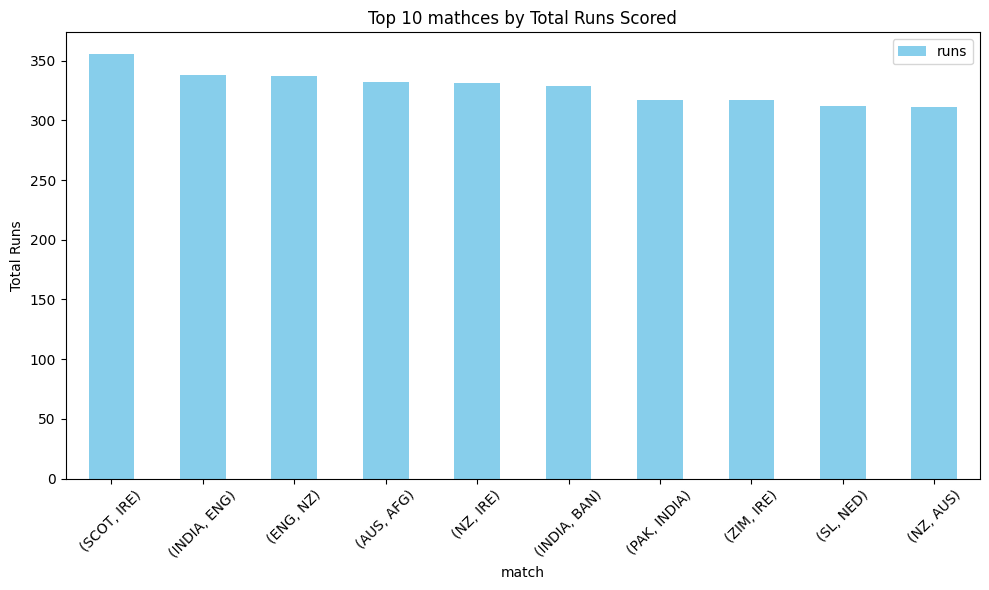

In [64]:
# Get top 10 teams based on total runs scored
top_10_teams = team_performance.nlargest(10, 'runs')

# Plot total runs scored by each team (top 10)
top_10_teams.plot(kind='bar', y='runs', figsize=(10, 6), color='skyblue')
plt.title('Top 10 mathces by Total Runs Scored')
plt.xlabel('match')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


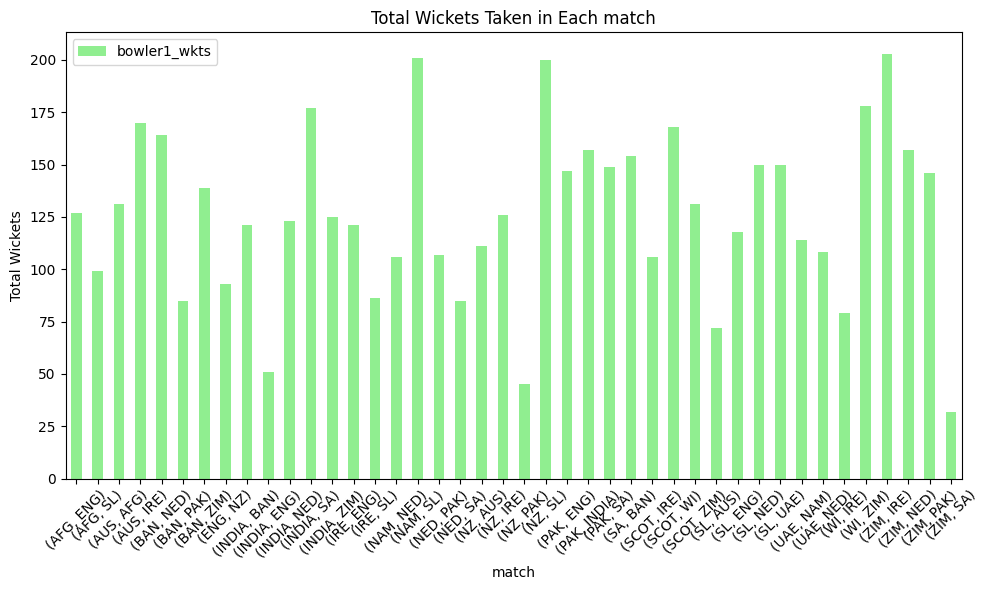

In [65]:
# Plot bowler1 wickets taken by each team
team_performance.plot(kind='bar', y='bowler1_wkts', figsize=(10, 6), color='lightgreen')
plt.title('Total Wickets Taken in Each match')
plt.xlabel('match')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

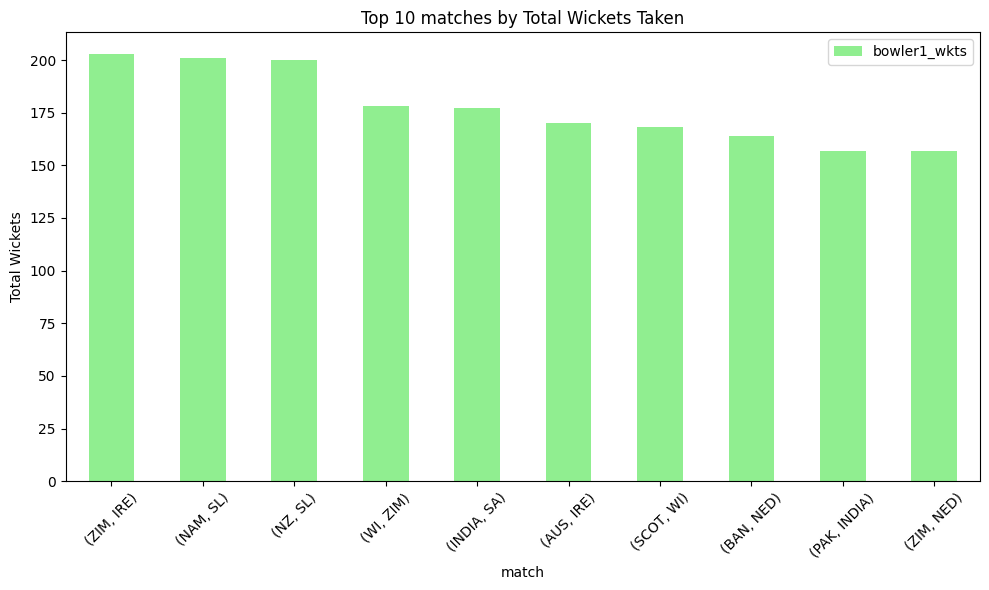

In [66]:
# Get top 10 teams based on total wickets taken
top_10_teams_wickets = team_performance.nlargest(10, 'bowler1_wkts')
# Plot total wickets taken by each team (top 10)
top_10_teams_wickets.plot(kind='bar', y='bowler1_wkts', figsize=(10, 6), color='lightgreen')
plt.title('Top 10 matches by Total Wickets Taken')
plt.xlabel('match')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [67]:
# Analyze individual player statistics
batsman_performance = df.groupby('batsman1_name').agg({'runs': 'sum'})
bowler_performance = df.groupby('bowler1_name').agg({'bowler1_wkts': 'sum'})

# Merge batsman and bowler performance dataframes
player_performance = pd.merge(batsman_performance, bowler_performance, left_index=True, right_index=True, how='outer')

# Rename columns for clarity
player_performance.rename(columns={'runs': 'Total Runs', 'bowler1_wkts': 'Total Wickets'}, inplace=True)

print("\nPlayer-wise performance metrics:")
print(player_performance)



Player-wise performance metrics:
                  Total Runs  Total Wickets
Aaron Finch            128.0            NaN
Aayan Afzal Khan        25.0            6.0
Adam Zampa               1.0           32.0
Adil Rashid              NaN           46.0
Afif Hossain           108.0            4.0
...                      ...            ...
Wessly Madhevere       120.0            0.0
Yasir Ali                5.0            NaN
Zahoor Khan              1.0           49.0
Zane Green               2.0            NaN
Zawar Farid              2.0            0.0

[213 rows x 2 columns]


In [68]:
# Identify leading run-scorers and wicket-takers
top_run_scorers = player_performance.nlargest(10, 'Total Runs')
top_wicket_takers = player_performance.nlargest(10, 'Total Wickets')

print("\nTop 10 run-scorers:")
print(top_run_scorers)

print("\nTop 10 wicket-takers:")
print(top_wicket_takers)



Top 10 run-scorers:
                  Total Runs  Total Wickets
Virat Kohli            310.0            NaN
Max O'Dowd             265.0            NaN
Jos Buttler            241.0            NaN
Suryakumar Yadav       236.0            NaN
Pathum Nissanka        232.0            NaN
Sikandar Raza          230.0           94.0
Kusal Mendis           229.0            NaN
Alex Hales             218.0            NaN
Lorcan Tucker          217.0            NaN
Glenn Phillips         209.0            NaN

Top 10 wicket-takers:
                            Total Runs  Total Wickets
Blessing Muzarabani                3.0          157.0
Arshdeep Singh                     2.0          154.0
Paul van Meekeren                 48.0          148.0
Maheesh Theekshana                11.0          121.0
Wanindu Hasaranga de Silva        26.0          121.0
Sam Curran                        13.0          118.0
Taskin Ahmed                      24.0          118.0
Anrich Nortje                      1.0  

**Virat Kohli:** With 310 runs to his name, Virat Kohli stands out as the highest run-scorer in the tournament. His consistent and classy batting at the top of the order has been instrumental in providing stability to the Indian batting line-up. Kohli's ability to build innings and rotate the strike effectively has made him a formidable force on the field.

**Max O'Dowd:** Following closely behind Kohli is Max O'Dowd with 265 runs. O'Dowd's batting prowess and ability to anchor the innings have been crucial for his team. His knack for playing long innings and finding gaps in the field has contributed significantly to his team's success, making him one of the standout performers of the tournament.

In [69]:
# Analyze performance against different oppositions
opposition_performance = df.groupby('match_name').agg({'runs': 'sum', 'bowler1_wkts': 'sum'})
print("\nPerformance against different oppositions:")
print(opposition_performance)



Performance against different oppositions:
             runs  bowler1_wkts
match_name                     
AFG v ENG     225           127
AFG v SL      291            99
AUS v AFG     332           131
AUS v IRE     298           170
AUS v NZ      311           111
AUS v SL      309            72
BAN v INDIA   329           121
BAN v NED     277           164
BAN v PAK     255            85
BAN v SA      301           154
BAN v ZIM     297           139
ENG v INDIA   338            51
ENG v IRE     262           121
ENG v NZ      337            93
ENG v PAK     270           147
ENG v SL      285           118
INDIA v NED   302           123
INDIA v PAK   317           157
INDIA v SA    270           177
INDIA v ZIM   295           125
IRE v NZ      331           126
IRE v SCOT    356           106
IRE v SL      261            86
IRE v WI      292            79
IRE v ZIM     317           203
NAM v NED     243           106
NAM v SL      271           201
NAM v UAE     288           

In [70]:
# Calculate 'runs_per_ball' before dropping NaN values
df['runs_per_ball'] = df['runs'] / df['ball']

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in any of the features used in the regression model
df_cleaned = df.dropna(subset=['runs', 'bowler1_wkts', 'runs_per_ball'])

# Check if DataFrame is empty after removing NaN values
if df_cleaned.empty:
    print("DataFrame is empty after removing NaN values. Please check your data.")
else:
    # Continue with regression analysis
    X = df_cleaned[['runs', 'bowler1_wkts']]
    y = df_cleaned['runs_per_ball']
    X = sm.add_constant(X)  # adding a constant
    model = sm.OLS(y, X).fit()
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          runs_per_ball   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     6133.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        22:26:14   Log-Likelihood:                -7778.7
No. Observations:                9814   AIC:                         1.556e+04
Df Residuals:                    9811   BIC:                         1.558e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0255      0.008      3.159   

In [71]:
# Assuming you have already defined X (predictor variables) and y (response variable)
# Add constant to the predictor variables
X = sm.add_constant(X)
# Fit OLS regression model with robust standard errors
model = sm.OLS(y, X).fit(cov_type='HC3') # 'HC3' is a method for robust standard errors
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          runs_per_ball   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1228.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        22:26:14   Log-Likelihood:                -7778.7
No. Observations:                9814   AIC:                         1.556e+04
Df Residuals:                    9811   BIC:                         1.558e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0255      0.007      3.515   

# Additional Visualizations

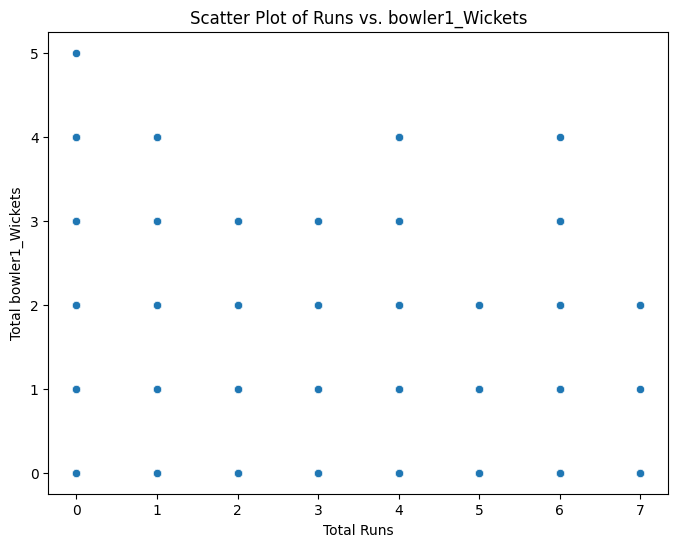

In [72]:
# Select numerical columns only
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Scatter plot of runs vs. wickets
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runs', y='bowler1_wkts', data=df)
plt.title('Scatter Plot of Runs vs. bowler1_Wickets')
plt.xlabel('Total Runs')
plt.ylabel('Total bowler1_Wickets')
plt.show()



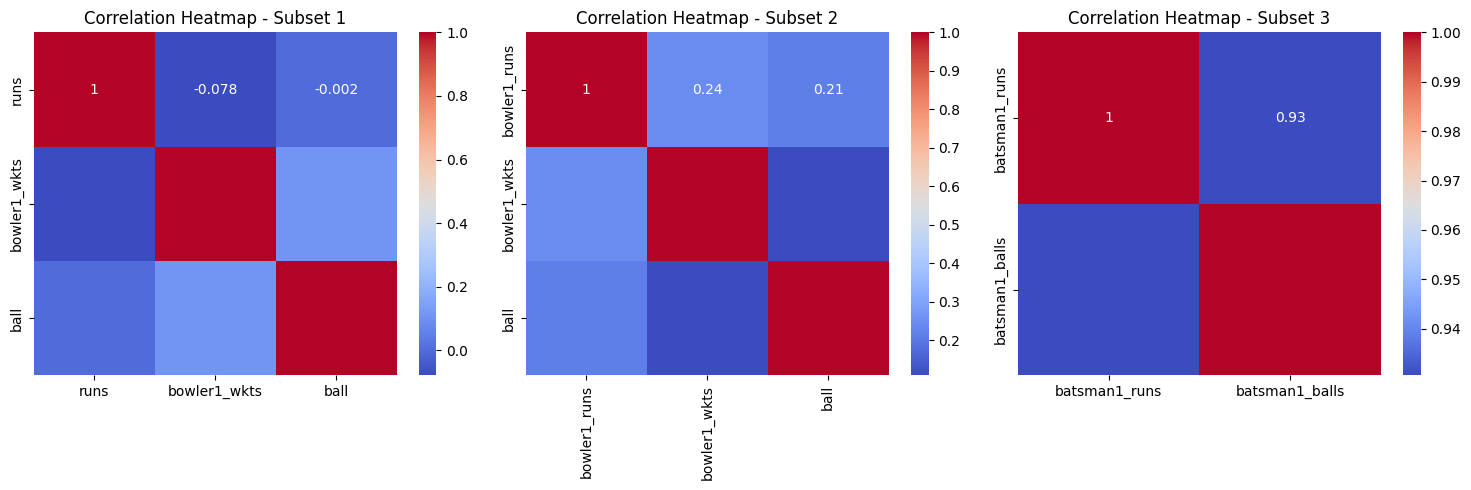

In [73]:
# Select numerical columns only
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Define subsets of columns
subset1 = ['runs', 'bowler1_wkts', 'ball']
subset2 = ['bowler1_runs', 'bowler1_wkts', 'ball']
subset3 = ['batsman1_runs', 'batsman1_balls']

# Calculate correlation matrices for each subset
subset1_corr = numerical_columns[subset1].corr()
subset2_corr = numerical_columns[subset2].corr()
subset3_corr = numerical_columns[subset3].corr()

# Create separate heatmaps for each subset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(subset1_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Subset 1')

plt.subplot(1, 3, 2)
sns.heatmap(subset2_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Subset 2')

plt.subplot(1, 3, 3)
sns.heatmap(subset3_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Subset 3')

plt.tight_layout()
plt.show()


# Conclusion:

- The analysis provides valuable insights into team and player performances during the T-20 World Cup 2022.
- Key findings include identifying top-performing teams, standout players, and critical match events such as runs scored and wickets taken.
- The regression analysis helps understand the relationship between runs, wickets, and runs per ball, providing insights into batting and bowling strategies.
- Visualizations such as bar plots and heatmaps aid in understanding data patterns and relationships.
- Further analysis and exploration can be done to delve deeper into specific aspects of the dataset and uncover more insights.